In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from copy import deepcopy
from astropy.stats import sigma_clip
from scipy.stats import iqr
from chainconsumer import ChainConsumer

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig_width_pt = 240.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

from astropy import coordinates as coords
import astropy.units as u
from scipy.signal import savgol_filter
from astroquery.sdss import SDSS
import pysynphot as S
from tools import *

In [47]:
data = pd.read_csv('K2_all_PS1_psc_ev_crowding_sdss2.csv')
ind = np.isfinite(data['ps1g_synSDSS'].values)
data = data.iloc[ind]

diff = abs(data['gMeanPSFMag'].values - data['cgMeanPSFMag'].values)
#ind = diff < .1
#data = data.iloc[ind]

ind = ((abs(data['zMeanPSFMagErr'].values) < 0.01) & 
       (abs(data['gMeanPSFMagErr'].values) < 0.01) & 
       (abs(data['rMeanPSFMagErr'].values) < 0.01) & 
       (abs(data['iMeanPSFMagErr'].values) < 0.01))
#data = data.iloc[ind]


zpsr = np.load('output/zeropoint_kep.npy')
extinctions = np.load('output/extinctions.npy')

In [11]:
np.sort(data['campaign'].unique())

array([ 0,  1,  3,  4,  5,  6,  8, 12, 13, 14, 16, 17, 18])

In [30]:
def kp_comp(d):
    gc = 10**(-2/5 *(d['gMeanPSFMag'].values-25))
    rc = 10**(-2/5 *(d['rMeanPSFMag'].values-25))
    ic = 10**(-2/5 *(d['iMeanPSFMag'].values-25))
    zc = 10**(-2/5 *(d['zMeanPSFMag'].values-25))
    
    #kcom = (0.25925186*gc + 0.4979566*rc + 0.17658766*ic + 0.06823672*zc)*(gc/rc)**(0.03316101)
    kcom = (0.25867244*gc + 0.49876061*rc + 0.17878655*ic + 0.06411439*zc)*(gc/ic)**0.01929574
    kcom = -2.5*np.log10(kcom) + 25
    return kcom

In [28]:
ind= (data['campaign'].values == 16) #& (data['Channel'].values == 2)

In [29]:
c16 = data.iloc[ind]

In [32]:
np.sort(c16['Channel'].unique())

array([ 4, 13, 14, 15, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 50, 51, 52, 53, 55, 56,
       57, 58, 59, 60, 63, 64, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       79, 83, 84])

In [10]:
c16.keys()

Index(['ID', 'campaign', 'Kpmag', 'RAJ2000', 'DecJ2000', 'objID', 'ps_score',
       'raMean', 'decMean', 'raMeanErr', 'decMeanErr', 'qualityFlag',
       'gMeanPSFMag', 'gMeanPSFMagErr', 'gMeanPSFMagNpt', 'rMeanPSFMag',
       'rMeanPSFMagErr', 'rMeanPSFMagNpt', 'iMeanPSFMag', 'iMeanPSFMagErr',
       'iMeanPSFMagNpt', 'zMeanPSFMag', 'zMeanPSFMagErr', 'zMeanPSFMagNpt',
       'yMeanPSFMag', 'yMeanPSFMagErr', 'yMeanPSFMagNpt', 'rMeanKronMag',
       'rMeanKronMagErr', 'nDetections', 'ng', 'nr', 'ni', 'nz', 'ny',
       'gFlags', 'gQfPerfect', 'rFlags', 'rQfPerfect', 'iFlags', 'iQfPerfect',
       'zFlags', 'zQfPerfect', 'yFlags', 'yQfPerfect', 'primaryDetection',
       'bestDetection', 'Module', 'Channel', 'Output', 'PDC', 'PDCe', 'SAP',
       'SAPe', 'cgMeanPSFMag', 'crMeanPSFMag', 'ciMeanPSFMag', 'czMeanPSFMag',
       'cyMeanPSFMag', 'cgMeanPSFMagErr', 'crMeanPSFMagErr', 'ciMeanPSFMagErr',
       'czMeanPSFMagErr', 'cyMeanPSFMagErr', 'kMeanPSFMag', 'kMeanPSFMagErr',
       'Kep_sy

<IPython.core.display.Javascript object>


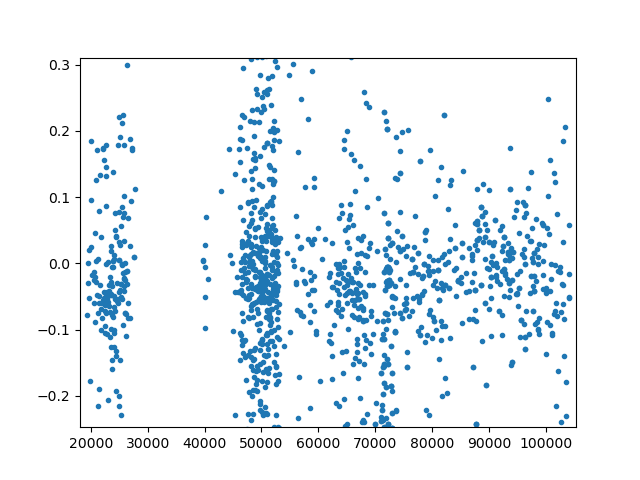

In [25]:
plt.figure()
plt.plot(-2.5*np.log10(data['Kpmag'])-data['Kep_synSDSS'],'.')

In [21]:
data['ps1g_synSDSS']

19320     15.705241
19487     17.374885
19541     17.835333
19703     17.476321
19748     17.303114
            ...    
103608    16.376872
104006    14.924283
104043    14.705966
104045    16.988817
104091    14.955826
Name: ps1g_synSDSS, Length: 1741, dtype: float64

(2, 37)


<IPython.core.display.Javascript object>


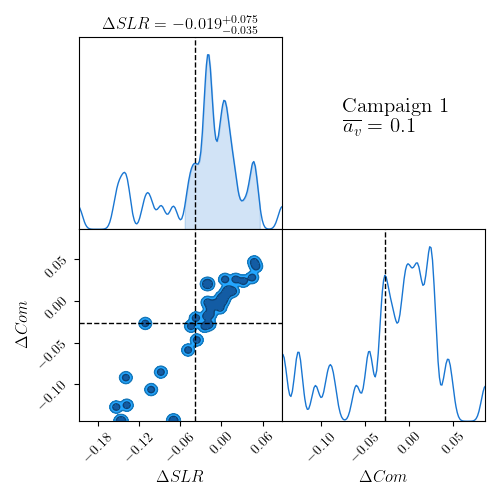

(2, 76)


<IPython.core.display.Javascript object>


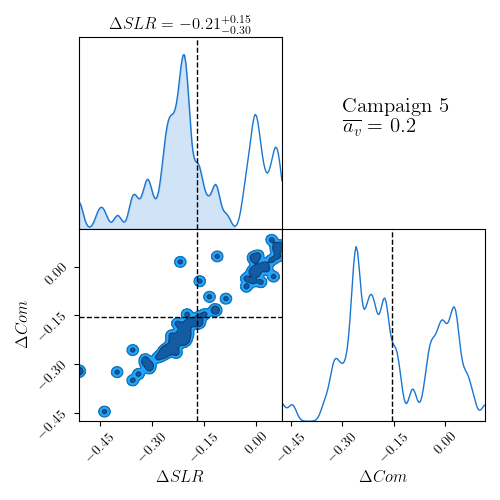

(2, 41)


<IPython.core.display.Javascript object>


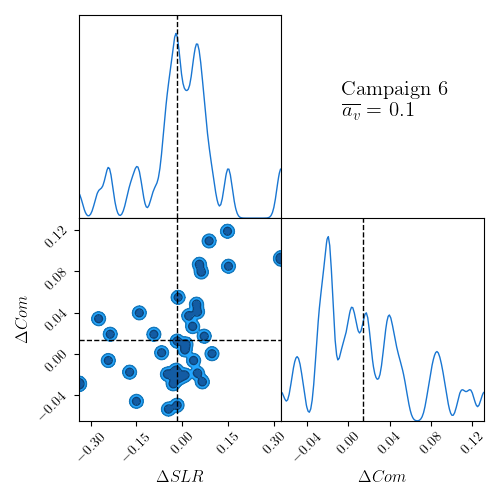

(2, 160)


<IPython.core.display.Javascript object>


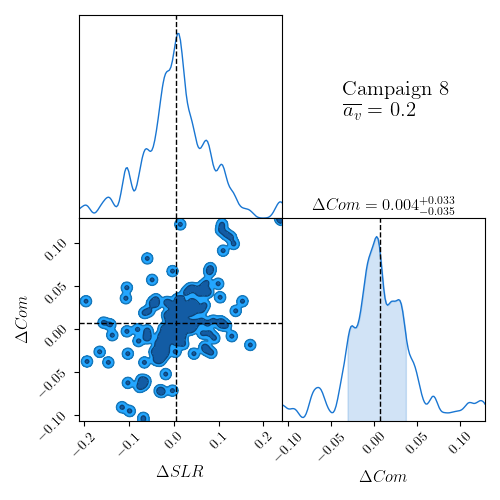

(2, 119)


<IPython.core.display.Javascript object>


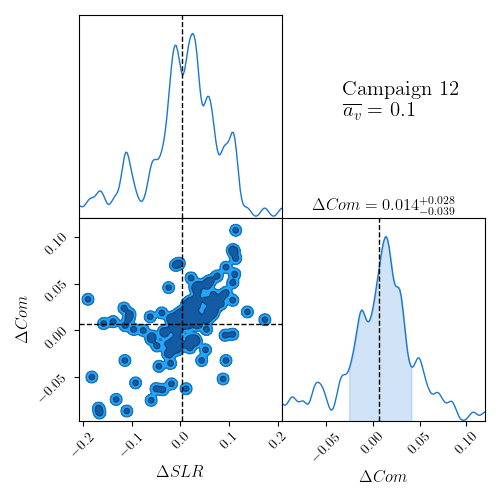

(2, 25)


<IPython.core.display.Javascript object>


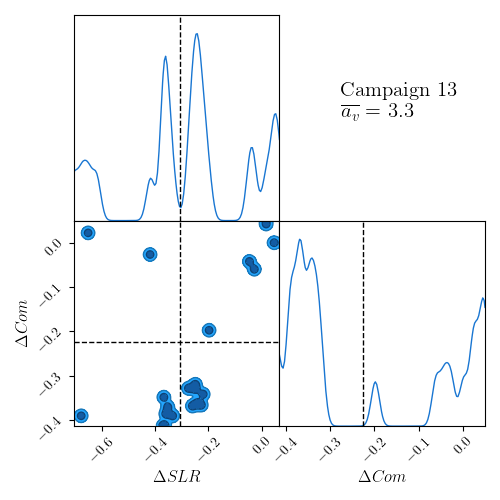

(2, 79)


<IPython.core.display.Javascript object>


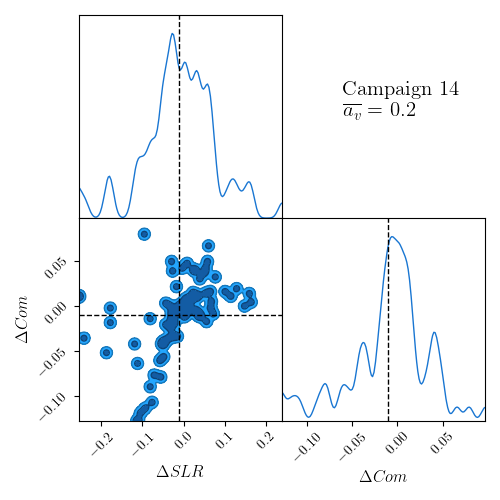

(2, 95)


<IPython.core.display.Javascript object>


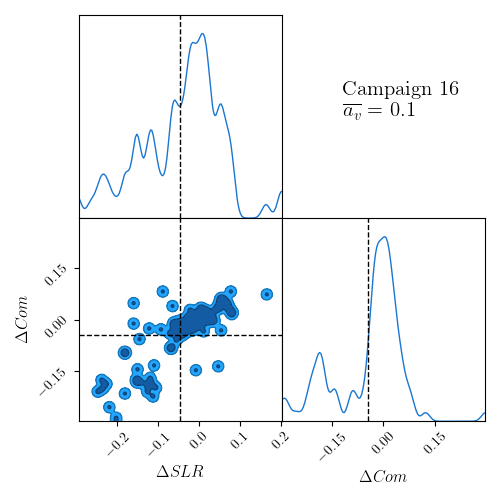

(2, 24)


<IPython.core.display.Javascript object>


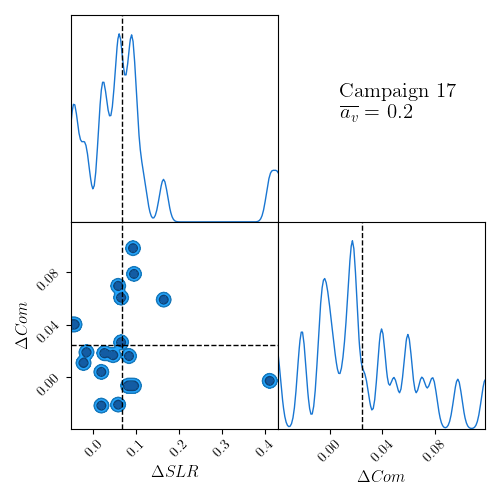

(2, 49)


<IPython.core.display.Javascript object>


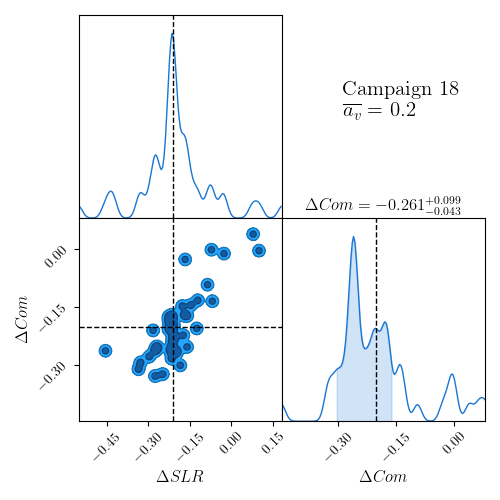

In [5]:
dslr = np.zeros(19)
dcom = np.zeros(19)

for o in range(19):
    #o += 1
    #if o == 9:
    #    sdfas
    d = deepcopy(data)
    d = d.iloc[data['campaign'].values == o]
    if len(d) > 10:
        ind = abs(d.crMeanPSFMag.values - d.rMeanPSFMag.values) < .1
        d = d.iloc[ind]
        ind = abs(d.gMeanPSFMag.values - d.rMeanPSFMag.values) < .9
        d = d.iloc[ind]
        gc = 10**(-2/5 *(d['gMeanPSFMag'].values-25))
        rc = 10**(-2/5 *(d['rMeanPSFMag'].values-25))
        ic = 10**(-2/5 *(d['iMeanPSFMag'].values-25))
        zc = 10**(-2/5 *(d['zMeanPSFMag'].values-25))

        kcom = 0.37528924*gc + 0.37592223*rc + 0.19063787*ic + 0.0586959*zc - 0.08385487*(gc-rc)
        kcom = (0.25925186*gc + 0.4979566*rc + 0.17658766*ic + 0.06823672*zc)*(gc/rc)**(0.03316101)
        kcom = -2.5*np.log10(kcom) + 25

        channel_inds = d['Channel'].values
        camp_inds = d['campaign'].values
        zz = zpsr[o]
        ee = extinctions[o]
        e = []
        z = []
        for i in range(len(channel_inds)):
            z += [zz[channel_inds[i]-1]]
            e += [ee[channel_inds[i]-1]]
        slr = np.array(z)#zpsr[camp_inds-1,channel_inds-1]
        slr[slr == 0] = np.nan
        exs = np.array(e)*3.1
        exs[slr == 0] = np.nan
        exs = np.nanmedian(exs)
        kslr = d.kMeanPSFMag.values + slr

        sdss = d['Kep_synSDSS'].values

        ind = (((d.gMeanPSFMag.values - d.rMeanPSFMag.values) > 0.2) & 
               ((d.gMeanPSFMag.values - d.rMeanPSFMag.values) < 0.8) &
              (d.rMeanPSFMag.values <= 18) & (d.rMeanPSFMag.values >= 14))
        dd = d.iloc[ind]

        slr_diff = (kslr-sdss)[ind]
        com_diff = (kcom-sdss)[ind]
        e = slr[ind]
        if len(slr_diff) > 10:
            ind = (~sigma_clip(slr_diff).mask & ~sigma_clip(com_diff).mask & np.isfinite(slr_diff))
            dd = dd.iloc[ind]
            arr = np.array([slr_diff[ind],com_diff[ind]])
            print(arr.shape)
            if len(arr.T) > 0:
                #dslr[o,0] = np.percentile(slr_diff[ind],16)
                #dslr[o,1] = np.percentile(slr_diff[ind],50)
                #dslr[o,2] = np.percentile(slr_diff[ind],84)

                #dcom[o,0] = np.percentile(com_diff[ind],16)
                #dcom[o,1] = np.percentile(com_diff[ind],50)
                #dcom[o,2] = np.percentile(com_diff[ind],84)

                mean = [np.nanmean(arr[0]),np.nanmean(arr[1])]

                c = ChainConsumer()
                c.add_chain(arr.T, parameters=["$ \Delta SLR$", "$\Delta Com$"])
                c.configure(flip=False)
                fig = c.plotter.plot(figsize="column", truth=mean)
                p = fig.axes[3]
                text = p.get_title()
                dslr[o] = c.analysis.get_summary()['$ \\Delta SLR$'][1]
                dcom[o] = c.analysis.get_summary()['$\\Delta Com$'][1]
                plt.tight_layout()
                plt.subplots_adjust(wspace=0,hspace=0)
                text = 'Campaign {}\n'.format(o) + r'$\overline{a_v}=$ '+str(np.round(exs*3.1,1))
                plt.text(0.3,1.5,text, transform=plt.gca().transAxes,fontsize=15)
                plt.savefig('figs/comparison/sdss_comparison{}.pdf'.format(o))

In [34]:
arr

array([[-0.12722305],
       [-0.14233709]])

In [44]:
data = pd.read_csv('../calibration/kepler/K2_all_PS1_psc_ev_crowding.csv')

In [38]:
data

,ID,campaign,Kpmag,RAJ2000,DecJ2000,objID,ps_score,raMean,decMean,raMeanErr,...,cgMeanPSFMag,crMeanPSFMag,ciMeanPSFMag,czMeanPSFMag,cyMeanPSFMag,cgMeanPSFMagErr,crMeanPSFMagErr,ciMeanPSFMagErr,czMeanPSFMagErr,cyMeanPSFMagErr
0,240252225,11,12.865,263.793562,-29.997039,72002637935683847,0.859804,263.793568,-29.997021,0.00462,...,17.426201,15.406700,14.317700,13.613900,13.144800,0.004809,0.010294,0.001445,0.001025,0.001122
1,240256177,11,15.209,264.202808,-29.983788,72012642029659459,0.835958,264.203038,-29.984112,0.00844,...,17.097323,16.874362,15.911289,15.249551,14.926345,0.086860,0.018828,0.028135,0.023943,0.075557
2,231458371,11,13.843,257.353395,-29.979526,72022573533964867,0.899167,257.353383,-29.979531,0.00494,...,15.381377,13.866554,13.016475,12.566082,12.211053,0.022690,0.018331,0.038792,0.079102,0.025083
3,231461068,11,15.238,257.460891,-29.969176,72032574608577262,0.905000,257.460843,-29.969208,0.00238,...,16.886793,15.609256,14.860408,14.414515,14.127842,0.145563,0.023078,0.007293,0.142025,0.094832
4,235586661,11,17.005,259.600918,-29.968737,72032596009007860,0.931750,259.600903,-29.968721,0.00347,...,19.304800,17.724701,17.017099,16.480200,16.224300,0.000114,0.011577,0.064799,0.006935,0.010569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163354,202064761,0,18.400,101.395000,28.836400,142601013953554418,0.992101,101.395334,28.836538,0.00303,...,18.580099,18.301800,18.464899,18.023001,17.814400,0.020748,0.002970,0.007900,0.017981,0.012069
163355,202066738,0,14.600,101.028900,28.868520,142641010288792817,0.995208,101.028904,28.868524,0.00457,...,14.758500,14.637400,14.634200,14.684200,14.673300,0.001351,0.001784,0.001860,0.003097,0.001718
163356,202085664,0,15.900,101.397410,28.888150,142661013974826192,0.966280,101.397416,28.887992,0.00289,...,16.403999,15.198100,14.540100,14.236000,14.067300,0.002615,0.001409,0.002631,0.002848,0.002690
163357,202067114,0,14.400,100.956330,28.919800,142701009562734305,0.983958,100.956319,28.919805,0.01055,...,14.573400,14.425300,14.402800,14.422900,14.400200,0.002163,0.003919,0.003746,0.003256,0.003861


<IPython.core.display.Javascript object>


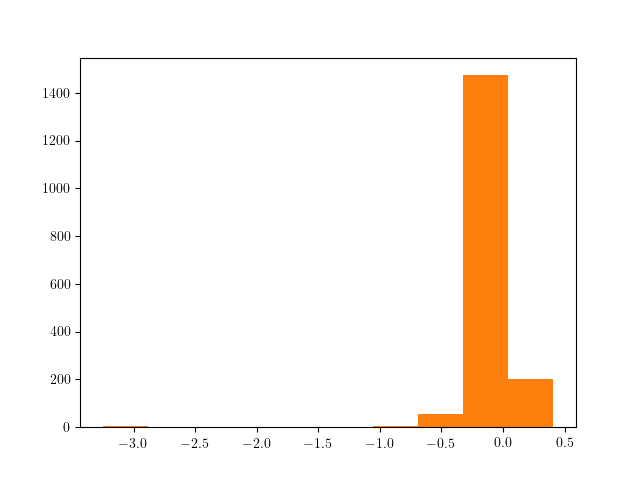

(array([4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        5.000e+00, 5.400e+01, 1.474e+03, 2.010e+02]),
 array([-3.25283212, -2.88661991, -2.52040769, -2.15419547, -1.78798325,
        -1.42177103, -1.05555882, -0.6893466 , -0.32313438,  0.04307784,
         0.40929005]),
 <a list of 10 Patch objects>)

In [43]:
plt.figure()
plt.hist(data['gMeanPSFMag']-data['ps1g_synSDSS_norm'])
plt.hist(data['gMeanPSFMag']-data['ps1g_synSDSS'])

In [63]:
data['Kep_synSDSS']

,ID,campaign,Kpmag,RAJ2000,DecJ2000,objID,ps_score,raMean,decMean,raMeanErr,...,ps1g_synSDSS,ps1g_synSDSS_norm,ps1r_synSDSS,ps1r_synSDSS_norm,ps1i_synSDSS,ps1i_synSDSS_norm,ps1z_synSDSS,ps1z_synSDSS_norm,ps1y_synSDSS,ps1y_synSDSS_norm
19320,245944855,12,15.242,352.704426,-11.026498,94763527044448574,0.998333,352.704483,-11.026554,0.00233,...,15.705241,15.705241,15.263014,15.263014,15.088235,15.088235,15.028855,15.028855,14.961739,14.961739
19487,245946615,12,16.794,352.117265,-10.963401,94843521172064317,1.000000,352.117253,-10.963457,0.00347,...,17.374885,17.374885,16.768459,16.768459,16.510336,16.510336,16.390013,16.390013,16.322251,16.322251
19541,245947242,12,16.915,352.749775,-10.943873,94863527497507762,1.000000,352.749762,-10.943895,0.00352,...,17.835333,17.835333,16.859788,16.859788,16.450012,16.450012,16.271481,16.271481,16.182079,16.182079
19703,245949032,12,17.731,355.096135,-10.883847,94933550960829743,0.991042,355.096066,-10.883859,0.00238,...,17.476321,17.476321,16.930088,16.930088,16.662356,16.662356,16.535277,16.535277,16.459739,16.459739
19748,245949443,12,16.785,352.969750,-10.871407,94953529697654667,1.000000,352.969780,-10.871450,0.00264,...,17.303114,17.303114,16.707921,16.707921,16.458120,16.458120,16.353369,16.353369,16.278854,16.278854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103608,202081906,0,15.700,97.158070,26.391370,139660971581839351,0.977083,97.158219,26.390564,0.00124,...,16.376872,16.376872,15.302042,15.302042,14.774595,14.774595,14.496061,14.496061,14.336528,14.336528
104006,202067375,0,14.900,101.563470,27.402340,140881015634743377,0.998750,101.563481,27.402328,0.00636,...,14.924283,14.924283,14.900336,14.900336,14.930758,14.930758,14.947120,14.947120,14.831548,14.831548
104043,202066571,0,14.700,101.174340,27.515120,141011011743508714,0.971333,101.174357,27.515112,0.00941,...,14.705966,14.705966,14.729031,14.729031,14.841257,14.841257,14.934433,14.934433,14.821291,14.821291
104045,202059078,0,17.000,101.125410,27.519760,141021011252634227,0.968601,101.125049,27.519653,0.01582,...,16.988817,16.988817,16.920071,16.920071,16.920191,16.920191,17.085976,17.085976,17.055849,17.055849


In [9]:
zpsr = np.load('output/zeropoint_kep.npy')
channel_inds = data['Channel'].values
camp_inds = data['campaign'].values
zz = zpsr[o]

e = []
z = []
for i in range(len(channel_inds)):
    z += [zz[channel_inds[i]-1]]
slr = np.array(z)#zpsr[camp_inds-1,channel_inds-1]
slr[slr == 0] = np.nan

kslr = data.kMeanPSFMag.values + slr

<IPython.core.display.Javascript object>


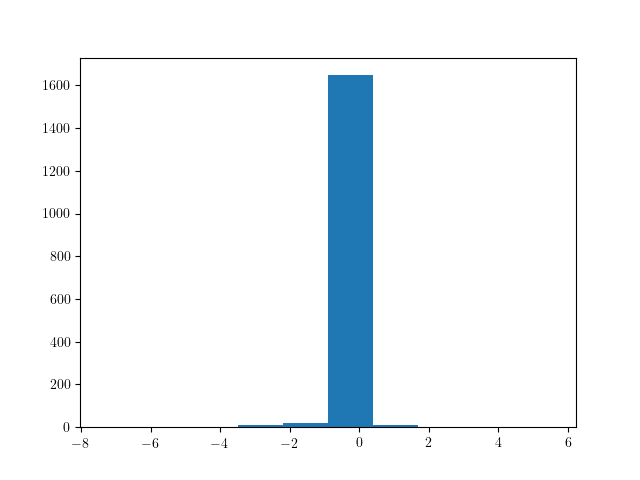

(array([1.000e+00, 1.000e+00, 2.000e+00, 9.000e+00, 2.200e+01, 1.648e+03,
        9.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([-7.38054126, -6.0844244 , -4.78830754, -3.49219067, -2.19607381,
        -0.89995694,  0.39615992,  1.69227678,  2.98839365,  4.28451051,
         5.58062738]),
 <a list of 10 Patch objects>)

In [122]:
plt.figure()
plt.hist(kslr-kp_comp(data))

In [52]:
dr = -(data.ps1r_synSDSS_norm.values - data.rMeanPSFMag.values)
dg = -(data.ps1g_synSDSS_norm.values - data.gMeanPSFMag.values)
di = -(data.ps1i_synSDSS_norm.values - data.iMeanPSFMag.values)
dk = -(data.Kep_synSDSS_norm.values - kp_comp(data))*1e3
dk2 = -(data.Kep_synSDSS_norm.values - kslr)*1e3
dke = -(data.Kep_synSDSS_norm.values - data.Kpmag)*1e3
gr = (data.gMeanPSFMag.values - data.rMeanPSFMag.values)

ind =  ((~sigma_clip(dg,sigma=3,masked=True).mask) & 
        (~sigma_clip(dr,sigma=3,masked=True).mask)& 
        (~sigma_clip(di,sigma=3,masked=True).mask)&
        (~sigma_clip(dk,sigma=3,masked=True).mask)&
        (~sigma_clip(dk2,sigma=3,masked=True).mask)&
        (~sigma_clip(dke,sigma=3,masked=True).mask))

ind2 =  ((~sigma_clip(dg,sigma=3,masked=True).mask) & 
        (~sigma_clip(dr,sigma=3,masked=True).mask)& 
        (~sigma_clip(di,sigma=3,masked=True).mask)&
        (~sigma_clip(dk,sigma=3,masked=True).mask)&
        (~sigma_clip(dk2,sigma=3,masked=True).mask)&
        (~sigma_clip(dke,sigma=3,masked=True).mask))
dr = dr[ind]
dg = dg[ind]
di = di[ind]
dk = dk[ind]
dk2 = dk2[ind]
dke = dke[ind]
gr = gr[ind]

col = gr < 1

ind =  ((~sigma_clip(dg[col],sigma=3,masked=True).mask) & 
        (~sigma_clip(dr[col],sigma=3,masked=True).mask)& 
        (~sigma_clip(di[col],sigma=3,masked=True).mask)&
        (~sigma_clip(dk[col],sigma=3,masked=True).mask)&
        (~sigma_clip(dk2[col],sigma=3,masked=True).mask)&
        (~sigma_clip(dke[col],sigma=3,masked=True).mask))

<IPython.core.display.Javascript object>


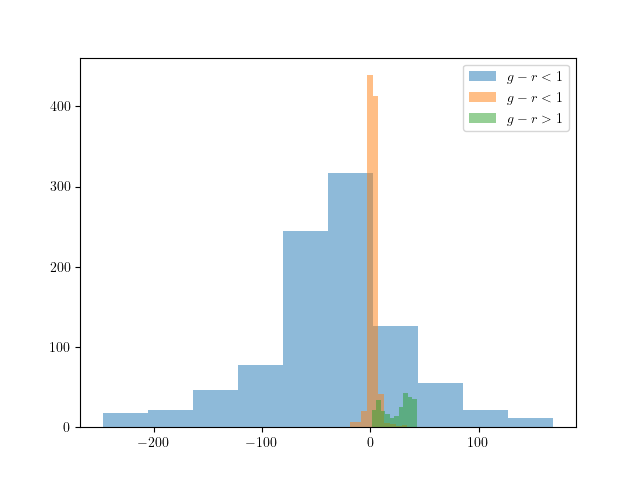

In [14]:
plt.figure()
#plt.hist(g[ind],alpha=0.5)
#plt.hist(r[ind],alpha=0.5);
#plt.hist(di[ind],alpha=0.5)
plt.hist(dk2[col],alpha=0.5,label='$g-r<1$')
plt.hist(dk[col],alpha=0.5,label='$g-r<1$')
plt.hist(dk[~col],alpha=0.5,label='$g-r>1$')
plt.legend()

<IPython.core.display.Javascript object>


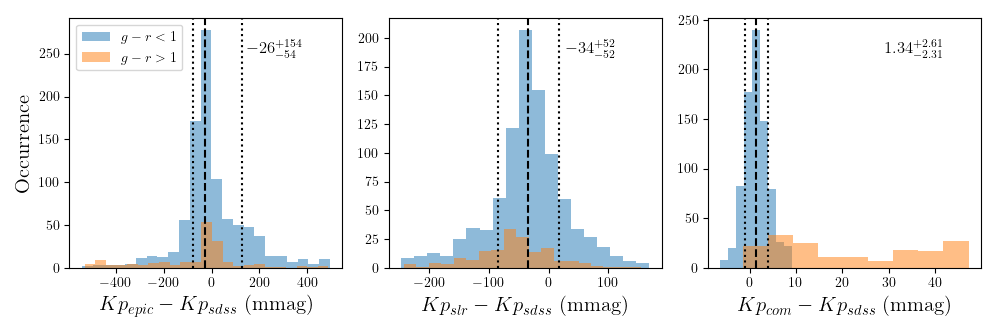

In [39]:
plt.figure(figsize=(3*fig_width,1*fig_width))

plt.subplot(131)
b = int(np.nanmax(dke[col]/1e3) - np.nanmin(dke[col]/1e3) /(2*iqr(dke[col]/1e3)*len(dke[col])**(-1/3)))
plt.hist(dke[col],alpha=0.5,label='$g-r<1$',bins=b)
plt.hist(dke[~col],alpha=0.5,label='$g-r>1$',bins=b)
plt.xlabel('$Kp_{epic}-Kp_{sdss}$ (mmag)',fontsize='15')
plt.ylabel('Occurrence',fontsize='15')
plt.legend(loc=2,fontsize=10)

med = np.percentile(dke[col],50)
low = np.percentile(dke[col],16)
high = np.percentile(dke[col],84)
plt.axvline(med,ls='--',color='k')
plt.axvline(low,ls=':',color='k')
plt.axvline(high,ls=':',color='k')

s = '$'+str(int(np.round(med,0)))+'^{+' + str(int(np.round(high-med,0)))+'}_{'+str(int(np.round(low-med,0)))+'}$'
plt.annotate(s,(.65,.86),fontsize=12,xycoords='axes fraction')

plt.subplot(132)
b = int(np.nanmax(dk2[col]/1e3) - np.nanmin(dk2[col]/1e3) /(2*iqr(dk2[col]/1e3)*len(dk2[col])**(-1/3)))
plt.hist(dk2[col],alpha=0.5,label='$g-r<1$',bins=b)
plt.hist(dk2[~col],alpha=0.5,label='$g-r>1$',bins=b)

plt.xlabel('$Kp_{slr}-Kp_{sdss}$ (mmag)',fontsize='15')

med = np.percentile(dk2[col],50)
low = np.percentile(dk2[col],16)
high = np.percentile(dk2[col],84)
plt.axvline(med,ls='--',color='k')
plt.axvline(low,ls=':',color='k')
plt.axvline(high,ls=':',color='k')

s = '$'+str(int(np.round(med,0)))+'^{+' + str(int(np.round(high-med,0)))+'}_{'+str(int(np.round(low-med,0)))+'}$'
plt.annotate(s,(.65,.86),fontsize=12,xycoords='axes fraction')


plt.subplot(133)
b = int(np.nanmax(dk[col][ind]/1e3) - np.nanmin(dk[col][ind]/1e3) /(2*iqr(dk[col][ind]/1e3)*len(dk[col][ind])**(-1/3)))
plt.hist(dk[col][ind],alpha=0.5,label='$g-r<1$',bins=b)
plt.hist(dk[~col],alpha=0.5,label='$g-r>1$',bins=b)
plt.xlabel('$Kp_{com}-Kp_{sdss}$ (mmag)',fontsize='15')

med = np.percentile(dk[col][ind],50)
low = np.percentile(dk[col][ind],16)
high = np.percentile(dk[col][ind],84)
plt.axvline(med,ls='--',color='k')
plt.axvline(low,ls=':',color='k')
plt.axvline(high,ls=':',color='k')

s = '$'+str((np.round(med,2)))+'^{+' + str((np.round(high-med,2)))+'}_{'+str((np.round(low-med,2)))+'}$'
plt.annotate(s,(.65,.86),fontsize=12,xycoords='axes fraction')


plt.tight_layout()
plt.savefig('compare2sdss.pdf')

In [53]:
good = data.iloc[ind2]
#good = good.iloc[col]

In [295]:
len(good[col])

967

In [190]:
np.sort(good.campaign.unique())

array([ 0,  1,  3,  4,  5,  6,  8, 12, 13, 14, 16, 17, 18])

In [287]:
len(data)

1741

In [54]:
from urllib.error import HTTPError

def SDSS_spec(coordinate):
    xid = SDSS.query_region(coordinate, spectro=True)
    if xid is not None:
        try:
            sp = SDSS.get_spectra(matches=xid)
            a = sp[0][1]
            spec = a.data
            wave = 10**spec['loglam']
            flux = spec['flux'] * 1e-17
            f = savgol_filter(flux,51,3)
            sdss_spec = S.ArraySpectrum(wave=10**spec['loglam'],
                                   flux=f,fluxunits='flam')
        except HTTPError:
            #print("spec doesn't actaully exist")
            sdss_spec = None
    else:
        sdss_spec = None

    return sdss_spec

def my_norm(Spec,pbs,mag):
    spec = deepcopy(Spec)
    m = Syn_mag(pbs,spec)
    m=m['ps1r']
    factor = 10**(-2/5*(mag-m))
    spec = S.ArraySpectrum(wave=spec.wave,waveunits=spec.waveunits,
                                   flux=spec.flux*factor,fluxunits=spec.fluxunits)
    return spec

passbands = at.Table.read('source_synphot/passbands/pbzptmag.txt',format='ascii')
pbnames = [x['obsmode'] for x in passbands if x['passband'].startswith("Kep")]
pbnames += [x['obsmode'] for x in passbands if x['passband'].startswith("PS1")]
model_mags = 0.
magmodel = 'AB'
pbs = source_synphot.passband.load_pbs(pbnames, model_mags, magmodel)
pbnames = pbs.keys()

def Syn_mag(pbs,spec):
    mag = {}
    for pb in pbs:
        if spec is not None:
            syn_mag = source_synphot.passband.synphot(spec,pbs[pb][0],zp=pbs[pb][1])
        else:
            syn_mag = np.nan
        mag[pb] = syn_mag
        
    return mag

In [55]:
cord = coords.SkyCoord(good.RAJ2000.values,good.DecJ2000.values, frame="icrs", unit="deg")

In [56]:
i = -1
spec = SDSS_spec(cord[i])
spec = deepcopy(spec)

#spec = spec.renorm(d['gMeanPSFMag'].iloc[i],'abmag',pbs['ps1g'][0])
spec = my_norm(spec,pbs,d['rMeanPSFMag'].iloc[i])
spec.convert('flam')

<IPython.core.display.Javascript object>


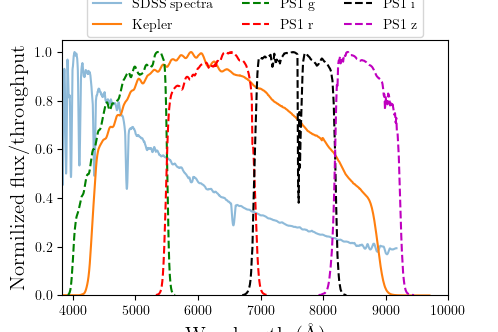

In [92]:
plt.figure(figsize=(1.5*fig_width,1*fig_width))
plt.plot(spec.wave,spec.flux/np.nanmax(spec.flux),alpha=.5,label='SDSS spectra')
#ax = plt.gca().twinx()
plt.plot(pbs['Kep'][0].wave,pbs['Kep'][0].throughput/np.nanmax(pbs['Kep'][0].throughput),label='Kepler')
plt.plot(pbs['ps1g'][0].wave,pbs['ps1g'][0].throughput/np.nanmax(pbs['ps1g'][0].throughput),'g--',label='PS1 g')
plt.plot(pbs['ps1r'][0].wave,pbs['ps1r'][0].throughput/np.nanmax(pbs['ps1r'][0].throughput),'r--',label='PS1 r')
plt.plot(pbs['ps1i'][0].wave,pbs['ps1i'][0].throughput/np.nanmax(pbs['ps1i'][0].throughput),'--',color='k',label='PS1 i')
plt.plot(pbs['ps1z'][0].wave,pbs['ps1z'][0].throughput/np.nanmax(pbs['ps1z'][0].throughput),'--',color='m',label='PS1 z')

#plt.legend(ncol=1, bbox_to_anchor=(1.01, .8))
plt.legend(ncol=3,loc='center', bbox_to_anchor=(.5, 1.1))
plt.xlim(3830,10000)
plt.ylim(0,1.05)

plt.xlabel(r'Wavelength $(\rm \AA)$',fontsize=15)
plt.ylabel('Normilized flux/throughput',fontsize=15)
plt.savefig('sdss_spec_example.pdf', bbox_inches = "tight")


In [283]:
(good)

,ID,campaign,Kpmag,RAJ2000,DecJ2000,objID,ps_score,raMean,decMean,raMeanErr,...,ps1g_synSDSS,ps1g_synSDSS_norm,ps1r_synSDSS,ps1r_synSDSS_norm,ps1i_synSDSS,ps1i_synSDSS_norm,ps1z_synSDSS,ps1z_synSDSS_norm,ps1y_synSDSS,ps1y_synSDSS_norm
19320,245944855,12,15.242,352.704426,-11.026498,94763527044448574,0.998333,352.704483,-11.026554,0.00233,...,15.705241,15.733828,15.263014,15.291600,15.088235,15.116821,15.028855,15.057441,14.961739,14.990325
19487,245946615,12,16.794,352.117265,-10.963401,94843521172064317,1.000000,352.117253,-10.963457,0.00347,...,17.374885,17.399826,16.768459,16.793400,16.510336,16.535277,16.390013,16.414955,16.322251,16.347192
19541,245947242,12,16.915,352.749775,-10.943873,94863527497507762,1.000000,352.749762,-10.943895,0.00352,...,17.835333,17.847945,16.859788,16.872400,16.450012,16.462624,16.271481,16.284093,16.182079,16.194691
19749,245949498,12,17.372,355.121076,-10.869399,94953551210227086,0.994583,355.121018,-10.869404,0.00253,...,18.136627,18.185014,17.382813,17.431200,17.029351,17.077739,16.853026,16.901413,16.783750,16.832138
19786,245949999,12,17.428,352.482423,-10.854699,94973524823774764,0.998750,352.482396,-10.854740,0.00399,...,17.874778,17.881989,16.881188,16.888399,16.470574,16.477784,16.267369,16.274580,16.130482,16.137693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103533,248047356,13,15.566,72.608017,26.163162,139390726079516402,0.995625,72.607979,26.163174,0.00301,...,16.506901,16.177044,15.900358,15.570500,15.552660,15.222802,15.233538,14.903680,15.061810,14.731952
103592,248071940,13,15.605,70.758144,26.358490,139630707581840771,0.988542,70.758173,26.358513,0.00544,...,16.731042,16.327001,15.938941,15.534900,15.519516,15.115474,15.199777,14.795736,15.004788,14.600747
103593,248072361,13,15.670,71.425855,26.361699,139630714258584627,1.000000,71.425830,26.361700,0.00202,...,16.319445,15.961713,15.832332,15.474600,15.557197,15.199465,15.282972,14.925240,15.132896,14.775164
104043,202066571,0,14.700,101.174340,27.515120,141011011743508714,0.971333,101.174357,27.515112,0.00941,...,14.705966,14.701534,14.729031,14.724600,14.841257,14.836826,14.934433,14.930002,14.821291,14.816860
